## Simplified sheet bending analysis
### Bending moment vs. curvature in a elastic, perfectly plastic material

The sheet bending analysis below is valid for a bend radius more than three or four times the sheet thickness: $R/t > 4$.

<img src="marciniak_fig6_1.png" alt="A unit length of a continuous strip bent along a line" width="480"/>

Figure 1: A unit length of a continuous strip bent along a line.

As shown in Figure 1, we consider a unit width of a continuous sheet in which a cylindrical bent region
of radius of curvature $\rho = R + t/2$ is flanked by flat sheet. The bend angle is
$\theta$, and a moment per unit width $M$, and a tension (force per unit width) $T$ are
applied. We note that the tension $T$ is applied at the middle surface of the sheet.

We consider that the sheet is formed by superimposed fibers or layers. The
neutral axis is the fiber where the stress is zero. Above the neutral axis,
the material is in tension. Below, the material is in compression.

In bending a thin sheet ($R/t > 4$), it may be assumed that a plane normal section in the
sheet will remain plane and normal and converge on the centre of curvature.

Note that the condition $R/t > 4$ is equivalent to $\rho/t > 4.5$:
$$
\frac{R}{t} = \frac{\rho-t/2}{t} = \frac{\rho}{t} - \frac{1}{2} > 4
\quad \rightarrow \quad
\frac{\rho}{t} > 4.5
$$

The bend angle $\theta$ is obtained from:
$$
l = \rho \theta \quad \rightarrow \quad
\theta = l \frac{1}{\rho}
$$
where $l$ is the arc length.

Run the cell below and use the slider in the `interactive plot` to automatically update the figure. It simulates the bending of a sheet metal element and shows the current values of angle, radius and curvature.

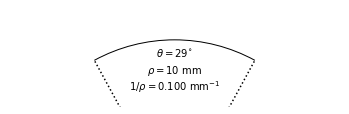

In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed
import ipywidgets as widgets
from bending import *
wc=widgets.FloatSlider(min=0.00001, max=0.25, step=0.00001, value=0.1, description='Curvature:', 
                       readout=True, readout_format='.5f',)
ip=interactive(plot_bend_element, curvature=wc)
ip

### Bending moment vs. curvature in a elastic, perfectly plastic material

Where sheet is bent by a pure moment without any
tension being applied, the neutral axis will be at
the mid-thickness. A linear strain distribution is
assumed:
$$
\varepsilon_1 = \frac{y}{\rho}
$$

We assume an elastic, perfectly plastic material:
$$
\overline\sigma = \left\{ 
\begin{aligned}
& E \overline\varepsilon & \text{, if } \overline\varepsilon < Y/E \\
& Y & \text{, if } \overline\varepsilon > Y/E
\end{aligned}
\right.
$$
or in the longitudinal direction:
$$
\sigma_1 = \left\{ 
\begin{aligned}
& E' \varepsilon_1 & \text{, if } \varepsilon_1 < Y'/E' \\
& Y' & \text{, if } \varepsilon_1 > Y'/E'
\end{aligned}
\right.
$$
where the Young modulus $E'$ and yield stress $Y'$ in plane strain conditions are:
$$
E' = \frac{E}{1-\nu^2} \quad , \quad
S' = \frac{\sqrt{3}}{2} S
$$

The equilibrium equations allow us to determine the bending moment:
$$
M = \int_{-t/2}^{t/2} \sigma_1 t \, dt = \left\{ 
\begin{aligned}
& M_e  & \text{, if } 1/\rho < 1/\rho_e \\
& M_e \frac{3-m^2}{2} & \text{, if } 1/\rho > 1/\rho_e
\end{aligned}
\right.
$$
where:
$$
m = \frac{1/\rho_e}{1/\rho}
$$
and the limiting elastic curvature and moment are:
$$
M_e = \frac{S' t^2}{6} \quad , \quad
\left(\frac{1}{\rho}\right)_e = \frac{2 S'}{E' t}
$$

### Example in Python

Define the sheet thickness and the material properties (Young modulus, Poison ratio and yield stress):

In [2]:
t = 1.2
E = 210e3
nu = 0.3
Y = 100

We will use the Python functions defined in the `bending` modulus to calculate the bending parameters $1/\rho_e$, $M_e$ and $M_p$ of the moment-curvature characteristic.

Material constants in plane strain: Ep = 230.8 GPa, Yp = 86.6 MPa
Limiting elastic curvature: (1/rho)e = 0.000625 mm-1 --> radius = 1599 mm
Limiting elastic moment: Me = 20.8 Nm/m
Fully plastic moment: Mp = 31.2 Nm/m


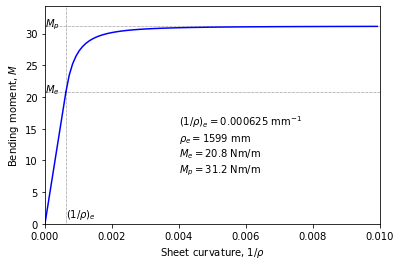

In [3]:
Ep, Yp = constants_plane_strain(E, nu, Y)
print('Material constants in plane strain: Ep = %.1f GPa, Yp = %.1f MPa' %(Ep/1e3, Yp))

rhoe, Me, Mp = bending_char(t, Ep, Yp)
print('Limiting elastic curvature: (1/rho)e = %.6f mm-1 --> radius = %.0f mm' % (1/rhoe, rhoe))
print('Limiting elastic moment: Me = %.1f Nm/m' % (Me))
print('Fully plastic moment: Mp = %.1f Nm/m' % (Mp))

plot_moment_curvature(rhoe, Me, Mp)

Use the slider in the `interactive plot` to automatically update the figure.

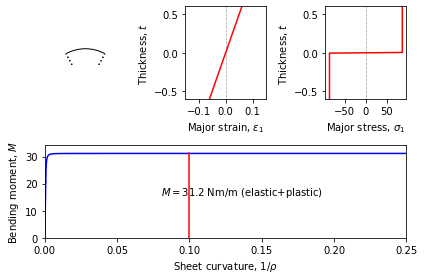

In [4]:
%matplotlib inline
ip=interactive(plot_bending, t=fixed(t), Ep=fixed(Ep), Yp=fixed(Yp), rhoe=fixed(rhoe), Me=fixed(Me), Mp=fixed(Mp), curvature=wc)
ip